# Séance 2: Au coeur des neurones

Adapté du Practical 1b de Deep Learning Indaba 2019.
© Deep Learning Indaba. Apache License 2.0.

## Introduction

Dans cette pratique, nous allons créer un petit framework Python qui nous permet d' entraîner nos propres réseaux de neurones, comme le fait PyTorch. Notre framework ne dépendra que de `numpy`. En travaillant sur cette pratique, vous aurez l'occasion de comprendre plus en détail le fonctionnement des frameworks modernes d'apprentissage en profondeur et l'idée de base de la différenciation automatique, qui est une technique logicielle puissante qui nous permet de calculer rapidement et facilement des gradients pour toutes sortes de programmes numériques.

$$ 
\newcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\vechat}[1]{\hat{\mathbf{#1}}}
\newcommand{\x}{\vec{x}}
\newcommand{\utheta}{θ}
\newcommand{\th}{\vec{\utheta}}
\newcommand{\y}{\vec{y}}
\newcommand{\b}{\vec{b}}
\newcommand{\W}{\textrm{W}}
\newcommand{\L}{\mathcal{L}}
\newcommand{\xhat}{\vechat{x}}
\newcommand{\yhat}{\vechat{y}}
\newcommand{\bhat}{\vechat{b}}
\newcommand{\What}{\hat{\W}}
\newcommand{\partialfrac}[2]{\frac{\partial{#1}}{\partial{#2}}}
\newcommand{\ipartialfrac}[2]{{\partial{#1}}/{\partial{#2}}}
\newcommand{\dydx}{\partialfrac{\y}{\x}}
\newcommand{\dld}[1]{\partialfrac{\L}{#1}}
\newcommand{\dldx}{\dld{\x}}
\newcommand{\dldy}{\dld{\y}}
\newcommand{\dldw}{\dld{W}}
\newcommand{\idld}[1]{\ipartialfrac{\L}{#1}}
\newcommand{\idldx}{\idld{\x}}
\newcommand{\idldy}{\idld{\y}}
\newcommand{\idydx}{\ipartialfrac{\y}{\x}}
\newcommand{\red}[1]{\color{red}{#1}}
\newcommand{\green}[1]{\color{green}{#1}}
\newcommand{\blue}[1]{\color{blue}{#1}}
\newcommand{\because}[1]{&& \triangleright \textrm{#1}}
\newcommand{\relu}[1]{\textrm{relu}({#1})}
\newcommand{\step}[1]{\textrm{step}({#1})}
\newcommand{\gap}{\hspace{0.5mm}}
\newcommand{\gapp}{\hspace{1mm}}
\newcommand{\ngap}{\hspace{-0.5mm}}
\newcommand{\ngapp}{\hspace{-1mm}}
$$

## Objectifs

* Comprendre le terme **differenciation automatique**.
* Comprendre les passes **forward** et **backward** et leurs applications.
* Comprendre les **produits vecteur-jacobiens** impliqués dans la rétropropagation.
* Comprendre les calculs mathématiques **des gradients** pour la passe arrière.
* Implémenter toutes les étapes impliquées dans l'entraînement d'un simple **perceptron multicouche (MLP)** pour résoudre la tâche de prédiction de chiffres MNIST.

## Structure d'un réseaux de neurones

* Un réseau de neurones est une composition de fonction linéaires et non linéaires.

* En général, les fonctions linéaires ont des paramètres et les fonction non linéaires n'en ont pas.

* Les paramètres du réseau représentent la collection de celles des fonctions la composant.

<center>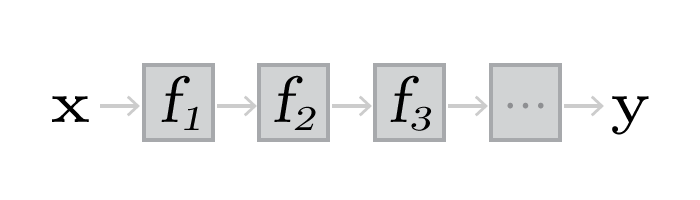</center>


<center>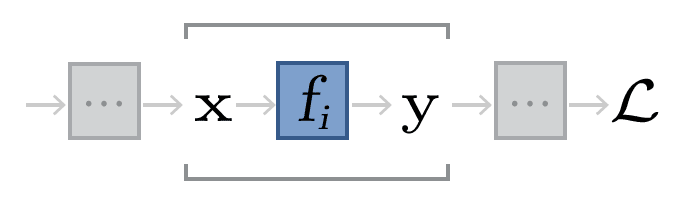</center>


#### Pour $f_i$ linéaire, on a:

<center>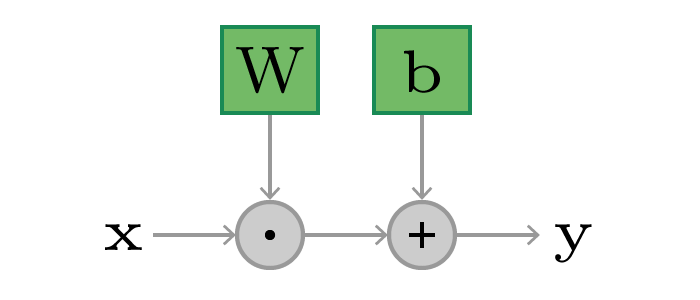</center>

$\y = \x  \W + \b$ 

## Algorithme de la descente du gradient et Backward

Le but de l'entraînement d'un réseau est de trouver les valeurs des paramètres $\th$ permettant de réaliser le correctement la tâche visée.

Pour cela, on définit une fonction "**loss $\L$** "  qui deux caractéristiques principales:
1. mesure le niveau de performance du réseau par rapport à la tâche voulue
2. est différentiable (pourquoi ?)

En général, on choisit $\L$ de sorte que plus faible est sa valeur mieux est sa performance ce qui revient à une minimisation de $\L$.

Soit un réseau de neurones $F(.; \th) = f_n \circ f_{n-1} \circ ... \circ f_1 $,  $x$ un ensemble de vecteur d'entrées, $y'$ l'ensemble de labels ou d'étiquettes associés à $x$, l'entraînement de $F$ consiste en la séquence d'opérations suivantes:

1. Initialiser $\th$ de $F(.; \th)$
1. Calculer $y =  F(x; \th)$
2. Calculer $\L(y, y') =  \L(F(x; \th), y')$
2. Calculer les gradients de $\L$ par rapport à l'ensemble des paramètres $\th$ de $F$
2. Mettre à jour $\th$: 
$$\th = \th - \eta \Large{{\dld \th}}$$
2. Répéter 2 à 5 jusqu'à convergence !




<center>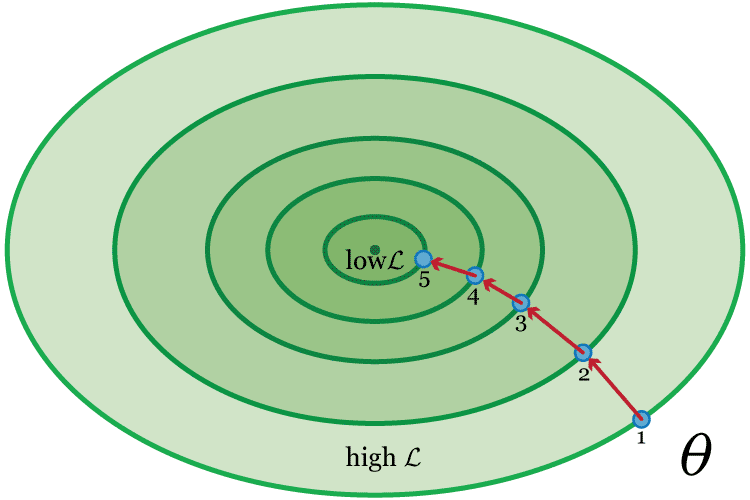</center>


In [1]:
import numpy as np
from matplotlib import pyplot as plt


class Callable:
    
    def forward(self, x):
        pass
    
    def __call__(self, x):
        return self.forward(x)


class Lineaire1(Callable):
    def __init__(self, ne, ns):
        self.W = np.random.randn(ne, ns)
        self.b = np.zeros((ns))
        self.What = np.zeros_like(self.W)
        self.bhat = np.zeros_like(self.b)
        
    def forward(self, x):
        y = x @ self.W + self.b
        return y
    
    # calcul de gradients
    def backward(self, x, yhat):
        pass
    
    def update(self):
        pass
        

In [2]:
ne, ns = 2,  3
f = Lineaire1(ne, ns)
x = np.array([-1, 1])[None]
f(x)

array([[-0.59768975,  1.87043563, -1.29575993]])

In [3]:
x = np.random.randn(5, ne)
f(x)

array([[-1.4550835 ,  4.65344098, -1.70109467],
       [-0.08485468,  0.24028311, -0.55175512],
       [ 0.26783169, -0.90893769, -0.44965559],
       [-0.17346634,  0.71415834,  2.11773736],
       [ 0.38004009, -1.36159918, -1.68416583]])

##  Calcul des gradients

<center>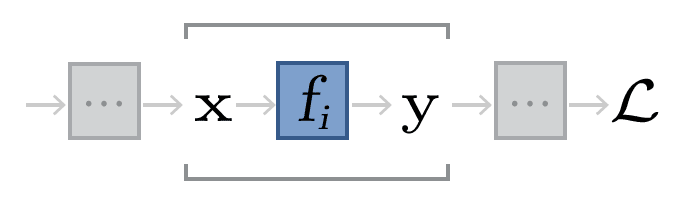</center>


<center>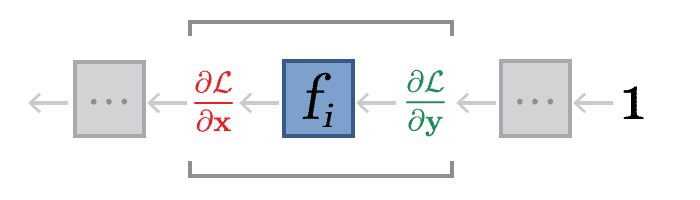</center>


<center>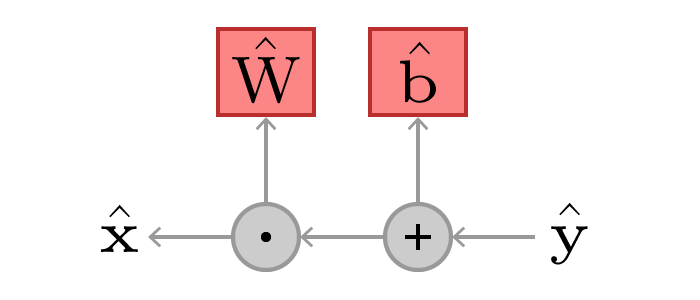</center>

$$\yhat := {\dld \y}$$

$$ \bhat := {\dld \b}$$

$$ \What := {\dld \W}$$

$$ \xhat := {\dld \x}$$

On suppose connu $\yhat$, on calcule $\bhat, \xhat $ et $\What$.

Dérivations, blackboard ....

$$\xhat := \red{\dldx} = \blue \dydx^\mathrm{T}\ngapp   \cdot {\green \dldy}$$


$$\red{\dld {x_i} } = \sum_{j\le n} \green{\dld{y_j}} \blue{\partialfrac{y_j}{x_i}}$$
Substituez $\x$ par $\y,\b$ ou $W$

In [4]:
class Lineaire2(Lineaire1):
    
    
    def forward(self, x):
        self.x = x # nécessaire au le calcul du gradient
        return super().forward(x)
    
    def backward(self, yhat):
        self.bhat += yhat 
        self.What += np.multiply.outer(self.x, yhat).mean(0) # moyenne sur la taille du batch
#         print(f'W, yhat shape: {self.W.shape, yhat.shape}')
        return self.W@yhat # retourne xhat
    
    def update(self, pas):
        self.W -= pas * self.What
        self.b -= pas * self.bhat
        self.zero_grad()
        
    def zero_grad(self):
        self.What.fill(0)
        self.bhat.fill(0)
                

In [5]:
class L2loss:
    def forward(self, ypred, ytrue):
        self.ypred, self.ytrue = ypred, ytrue
        return 0.5*((ypred - ytrue)**2).mean((0,1))
    
    def backward(self):
        return (self.ypred - self.ytrue).mean((0))
    
    def __call__(self, ypred, ytrue):
        return self.forward(ypred, ytrue)

In [6]:
bs = 4
ne = 2
ns = 3
np.random.seed(12)
f = Lineaire2(ne, ns)
x = np.random.randn(bs, ne)
y = np.random.randn(bs, ns)
# x = np.array([-1, 1]) 
f(x), y

(array([[ 0.20690052, -0.09404233,  0.18575898],
        [-5.26589657,  2.71278853, -4.60308679],
        [-1.08628622,  0.76319961, -0.87002572],
        [ 2.5850526 , -1.66200854,  2.13064854]]),
 array([[ 1.34235637, -0.12214979,  1.01251548],
        [-0.91386915, -1.02953021,  1.20979645],
        [ 0.5018723 ,  0.13884618,  0.64076111],
        [ 0.52733267, -1.15436024, -2.21333348]]))

In [7]:
for i in range (1000):
    loss = L2loss()
    v = loss(f(x), y)
    if i %100 == 0: print(f'loss: {v}')
    yhat = loss.backward()
    f.backward(yhat)
    f.update(0.01)

loss: 4.052704985092134
loss: 2.482720663585616
loss: 2.1893687715030663
loss: 2.1185260213905743
loss: 2.099494710602435
loss: 2.094203580005113
loss: 2.092717629378129
loss: 2.0922991167044667
loss: 2.0921811482203565
loss: 2.0921478881585074


In [8]:
f(x), y

(array([[ 1.143507  , -0.8195842 ,  0.89624047],
        [-2.76933005,  0.77882419, -2.70926654],
        [ 0.19280127, -0.22764504,  0.10025157],
        [ 2.89069803, -1.89877666,  2.36250197]]),
 array([[ 1.34235637, -0.12214979,  1.01251548],
        [-0.91386915, -1.02953021,  1.20979645],
        [ 0.5018723 ,  0.13884618,  0.64076111],
        [ 0.52733267, -1.15436024, -2.21333348]]))

In [9]:
loss(f(x), y)

2.092138510201946

In [10]:
f.What.shape, f.W.shape,  f.b.shape, f.bhat.shape

((2, 3), (2, 3), (3,), (3,))

In [11]:
f.What, f.W

(array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([[ 0.39726752, -0.62277072,  0.18500187],
        [-1.19991847,  0.365185  , -1.15481651]]))

In [12]:
f.update(0.01)
f.What, f.W

(array([[0., 0., 0.],
        [0., 0., 0.]]),
 array([[ 0.39726752, -0.62277072,  0.18500187],
        [-1.19991847,  0.365185  , -1.15481651]]))

In [13]:
f.b.shape, f.bhat.shape

((3,), (3,))

## Implémentation d'un réseau composé de plusieurs couches

In [14]:
class Réseau:
    def __init__(self, couches):
        self.couches = couches
    
    def forward(self, x):
        y=x
        for c in self.couches:
            y = c(y)
        self.y = y
        return y
    
    def backward(self, yhat):
        xhat = yhat
        for c in reversed(self.couches):
            xhat = c.backward(xhat)
            
    def update(self, pas):
        for c in self.couches:
            c.update(pas)

## Test sur un réseau d'une seul couche

In [15]:
net = Réseau([Lineaire2(2, 1)])

In [16]:
# x = np.random.randn(2)
x = np.array([1, -1])[None]
y = np.array([10])[None]
ypred= net.forward(x)
ypred

array([[0.10633774]])

In [17]:
epochs = 10
lr = 0.2
for i in range(epochs):
    
    ypred= net.forward(x)
#     print(f'forward: {ypred}')
    loss = L2loss()
    lossvalue = loss(ypred, y)
    print(f'loss: {lossvalue}')
    yhat = loss.backward()
#     print(f'dloss/y: {yhat}')
    net.backward(yhat)
    net.update(lr)
    
print(f'ypred, ytrue = {ypred, y}')
    

loss: 48.942276450874786
loss: 7.830764232139961
loss: 1.2529222771423942
loss: 0.2004675643427831
loss: 0.032074810294844935
loss: 0.005131969647175298
loss: 0.0008211151435480188
loss: 0.00013137842296769453
loss: 2.102054767482191e-05
loss: 3.363287627972427e-06
ypred, ytrue = (array([[9.99740644]]), array([[10]]))


In [18]:
def generate_data(n, exp=1):
    x = np.arange(0,n).astype(float)
    y = np.random.randn(n)*3 - 0.2*(x-9.5)**exp + 1
    return x,y
    

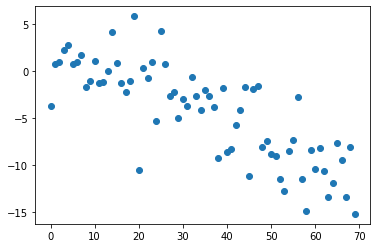

In [19]:
time, speed = generate_data(70)
plt.scatter(time,speed);

In [20]:
x = time[:, None]
y = speed[:, None]
net = Réseau([Lineaire2(1,1)])
x.shape, y.shape

((70, 1), (70, 1))

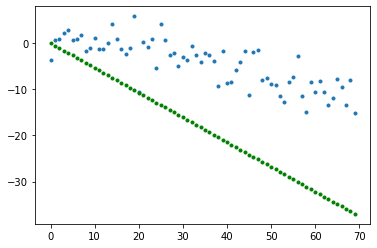

loss: 887.3331449103944
loss: 118.7378561815733
loss: 45.74887388224378
loss: 38.704713293241305
loss: 37.98928973909379
loss: 37.90476339045318
loss: 37.8902274232718
loss: 37.88551773193081
loss: 37.88272603483664
loss: 37.880420128228224


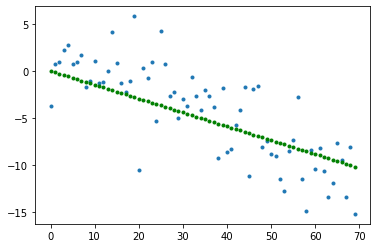

In [21]:
epochs = 10
lr = 0.01
def train_loop(model, x_, y_, lr, epochs, batchsize = 10, lossfreq=10):
    plt.plot(x_, y_, '.', model.forward(x_), 'g.' )
    plt.show()
    for i in range(epochs):
        lossvalue = 0
        for j in range (0, x_.shape[0], batchsize):
            x = x_[j:j+batchsize]
            y= y_[j:j+batchsize]
            ypred= model.forward(x)
        #     print(f'forward: {ypred}')
            loss = L2loss()
            lossvalue += loss(ypred, y)
            yhat = loss.backward()
        #     print(f'dloss/y: {yhat}')
            net.backward(yhat)
        net.update(lr)
        if i% lossfreq == 0: print(f'loss: {lossvalue}')
    plt.plot(x_, y_, '.', model.forward(x_), 'g.' )
    plt.show()
        
train_loop(net, x, y, 0.00001, 100)

In [22]:
net = Réseau([Lineaire2(1, 2), Lineaire2(2,1)])

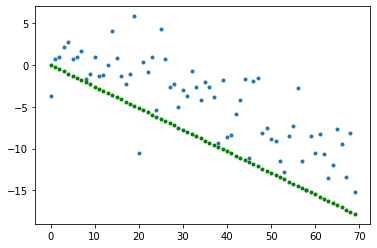

loss: 107.27275642857374
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan


<ipython-input-1-c5a7962a0726>:22: RuntimeWarning: overflow encountered in matmul
  y = x @ self.W + self.b
<ipython-input-4-584d22d04368>:10: RuntimeWarning: invalid value encountered in multiply
  self.What += np.multiply.outer(self.x, yhat).mean(0) # moyenne sur la taille du batch


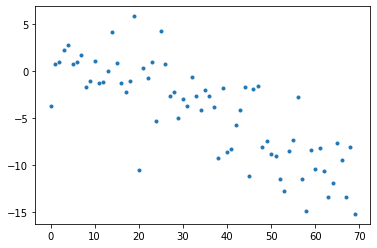

In [23]:
train_loop(net, x, y, 0.001, 100)

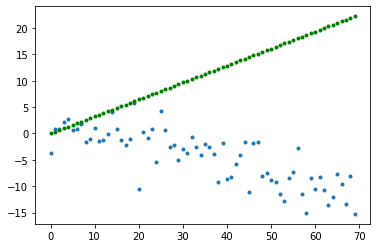

loss: 1266.6115597377816
loss: 37.96505460382086
loss: 37.923107212810294
loss: 37.88145570680818
loss: 37.84009631981071


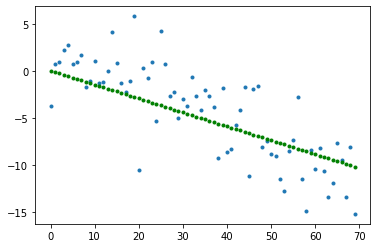

In [24]:
net = Réseau([Lineaire2(1, 2), Lineaire2(2,1)])
train_loop(net, x, y, 0.0001, 50)

## Introduction de non-linéarité

<center>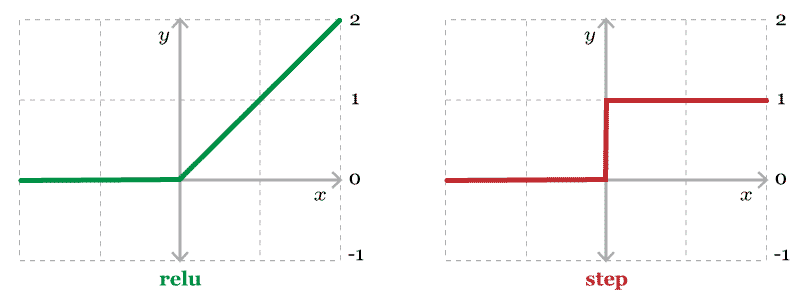</center>


In [25]:
class Relu(Callable):
    
    def forward(self, x):
        self.x = x
        return (x>0)*x
    
    def backward(self, yhat):
#         print(f"relu: x, yhat shape: {self.x.shape, yhat.shape}")
        return yhat*(self.x>0).astype(float).mean(0)
    
    def update(self, pas):
        pass



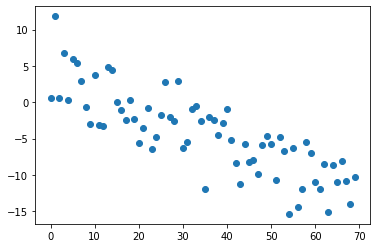

In [26]:
time, speed = generate_data(70, exp=1)
plt.scatter(time,speed);

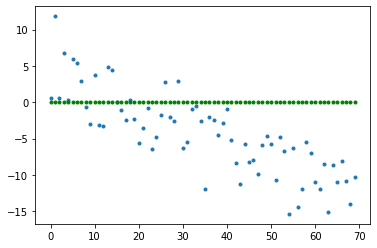

loss: 173.40621279649073
loss: 126.35890725429277
loss: 114.76287065054161
loss: 111.90472471921026
loss: 111.20026004356897
loss: 111.0266263344619
loss: 110.98382977420734
loss: 110.9732814447439
loss: 110.97068153358731
loss: 110.97004071761302


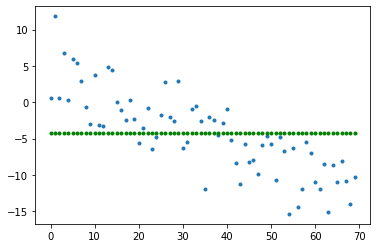

In [27]:
x = time[:, None]
y = speed[:, None]
net = Réseau([Lineaire2(1, 2), Relu(), Lineaire2(2,2), Relu(), Lineaire2(2,1)])
train_loop(net, x, y, 0.0001, 10000, lossfreq=1000)

In [28]:
import matplotlib.pyplot as plt

def to_array(x):
    return np.array(x, copy=False, ndmin=1)

def train(model, data_generator, total_batches, batch_size=64, learning_rate=0.01, loss_function=L2loss):
    losses = []
    
    period = np.floor(total_batches / 10) # how often to print loss
    avg_loss = 0 
    
    print("batch\tloss")
    
    for batch_number in range(1, total_batches + 1):
      
        # collect gradients from `batch_size` examples
        loss = 0 
        for i in range(batch_size):
            x, y = data_generator()
#             if i == 0: print(f'x, y shape: {x.shape, y.shape}')
            loss += loss_function(model, to_array(x), to_array(y))
        loss /= batch_size
        losses.append(loss)
    
        # periodically print the loss
        avg_loss += loss    
        if batch_number % period == 0: 
            print(f"{batch_number}\t{avg_loss/period:0.3g}")
            avg_loss = 0
        
        # do a step of SGD, using a gradually decreasing learning rate
        schedule = np.sqrt(1.0 - (batch_number - 1) / total_batches)
        step_size = learning_rate / batch_size * schedule
        model.update(step_size)

    plt.semilogy(losses)
    plt.show()

## Entraînement sur MNIST

We are now going to train on *half* of the famous MNIST (pronounced "em-nist") dataset of handwritten digits (taking only the digits 0 through 4). 

### Obtenir les données

To access the data, we will use tensorflow - but we will not use any other functionality from tensorflow.

In [29]:
from torchvision.datasets import MNIST

mnist = MNIST('./', download=True)

(x_train, y_train) = (mnist.train_data.numpy(), mnist.train_labels.numpy())
(x_test, y_test) =   (mnist.test_data.numpy(), mnist.test_labels.numpy())
x_train, x_test = x_train / 255.0, x_test / 255.0

/home/ismael/Utils/miniconda2/envs/fastai2/lib/python3.8/site-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/home/ismael/Utils/miniconda2/envs/fastai2/lib/python3.8/site-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/home/ismael/Utils/miniconda2/envs/fastai2/lib/python3.8/site-packages/torchvision/datasets/mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/home/ismael/Utils/miniconda2/envs/fastai2/lib/python3.8/site-packages/torchvision/datasets/mnist.py:53: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


The variables `x_train` and `x_test` each store a numpy array that contains the 60,000 images and the labels respectively. 

In [30]:
print("x shape is", x_train.shape)
print("y shape is", y_train.shape)

x shape is (60000, 28, 28)
y shape is (60000,)


The dimensions 28, 28 are the width and height of the images in the training set.

### Visualizing the training data

Let's visualize some of the training data. Here's a function that plots an array as an grayscale image:


In [31]:
import matplotlib.pyplot as plt

def plot_image(array):
    plt.imshow(array, cmap='gray_r');

The following code will take the first 10 image arrays from the training set, stack them horizontally into one 2-dimensional array, and plot it using our new function. We are also printing the first 10 labels so we can compare them.

[0 4 1 9 2 1 3 1 4]


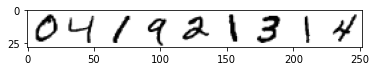

In [32]:
plot_image(np.hstack(x_train[1:10]))
print(y_train[1:10])

As you can see, the *i*'th label corresponds to the *i*'th handwritten digit!

### Sampling from the training data

We now write a function that will sample at random an image and its matching label, returning them as a pair. The `while` loop will make sure we get a digit that is either zero, one, two, three, or four - it'll keep trying again until it gets one:

In [37]:
def sample_random_mnist_example(bs):
    # keep sampling until we get a digit in range 0..4
#     while True:
    i = np.random.choice(60000,size=bs, replace=False)
    x = x_train[i]
    y = y_train[i]
#     if y[0] < 5: break
    return x, y

Let's try this function out. Notice that the single 1 x 28 x 28 array representing the image into a 784-dimensional vector. Similarly, the label is stored in a 1-dimensional vector.

In [38]:
x, y = sample_random_mnist_example(64)
print("x shape is", x.shape)
print("y shape is", y.shape)

x shape is (64, 28, 28)
y shape is (64,)


### Optional reading: can we expect problems from using L2 loss for classification?
 
The training data labels are the integers 0, 1, 2, .., 9, corresponding to a training image of the handwritten digit zero, one, two, etc. 

To re-use our previous code, the loss function we will use for this problem is the L2 loss. However, this choice of loss function has several problems. In fact, it's really bad!

To see why, let's look at two kinds of misclassification the net might do:

1. the net predicts **y = 0** but the actual label is **y' = 4**. This gives a **high** L2 loss value of $\L = (y - y')^2 = (0-4)^2 = 16$
2. the net predicts **y = 0** but the actual label is **y' = 1**. This gives a **low** L2 loss value of $\L = (y - y')^2 = (0-1)^2 = 1$

But this difference not ideal, because we as human beings care equally about both these misclassifications! Using the L2 loss function will train the net to minimize one kind of error much more than the other kind of error.

Similarly, our net will usually predict non-integer values like `3.8` or `5.2`, which we will choose to interpret as predictions for the nearest integer, like four or five. Again, this is unnatural, because it only allows the network to express uncertainty between neighboring numbers three versus four -- it cannot express uncertainty between zero and four!

A much better choice of loss function is called the *cross-entropy loss*, which has none of these problems. We will leave this as an exercise in a later section.


### Training the net 

In [42]:
mnist_mlp = Réseau([Lineaire2(28*28, 100), Relu(), Lineaire2(100, 1)])
train(mnist_mlp, sample_random_mnist_example(64), 1000, learning_rate=0.1)  

batch	loss


TypeError: 'tuple' object is not callable

You should see a steadily decreasing loss curve above, with a final loss of around 0.05 to 0.2 (try again if the loss remains high by the end of training).

Let's try the trained net out on an example from the test set.

In [ ]:
x = x_test[1]
plot_image(x)

You should see an image of a handwritten digit two above. So if we are lucky, the net should predict a label that is close to the value `2.0`:

In [ ]:
y, _ = mnist_mlp(x.flatten())
y

We can try to evaluate the performance by hand, but this isn't very scientific. So let's measure the accuracy on the entire test set, which contains 10,000 examples. We'll do this by looping over all examples in the test set, testing whether the output of the net, when rounded to the closest integer, gives the true label. We'll then return the fraction of examples that were correctly classified:

In [ ]:
def measure_mnist_accuracy(model, to_prediction=np.round):
  
    number_correct = number_seen = 0
    for i in range(10000):
        x = x_test[i]
        y_target = y_test[i]
        
        # skip labels not in 0..4
        if y_target >= 5: 
            continue      
            
        # get net's prediction
        y, _ = model.forward(x.flatten())
        
        # update count of number of correctly predicted examples
        if to_prediction(y) == y_target: 
            number_correct += 1
        number_seen += 1
        
    return number_correct / number_seen

We've written this as a function so that it is easy to use again later. The first argument is the model whose predictions should be measured. We also have an optional `to_prediction` argument to allow us to test nets that have output of different forms than a single real number (we'll need this later when we investigate cross-entropy).

Let's try it out on the model we just trained:

In [ ]:
measure_mnist_accuracy(mnist_mlp)

You should see an accuracy in the range 70-90%. If you don't, try running the `train` step again and testing the accuracy one more time -- sometimes the random initialization of the net just doesn't allow it to learn as well.

### Exercise: switching to cross-entropy loss

We should be able to improve our training process by using the so-called **cross-entropy loss** (CE loss) instead of L2 loss. This will avoid the problem of some misclassifications (e.g. 0 vs 4) contributing much more loss than others (0 vs 1).

For simple situations like MNIST, the CE loss can be defined as follows, where $y$ is a vector of probabilities, one for each class, and $i$ is the index of the _true_ class:

$$\mathrm{CE}(y, i) = - log(y_i)$$

**Simple exercise**: convince yourself that minimizing this loss will encourage the likelihood of the _true_ class to be high. 

How do we get our network to produce a vector of probabilities? The most common way is to use the so-called **softmax function**, which is defined as:

$$\textrm{softmax}(\x) = \frac{e^{\x}}{\sum e^\x}$$ 

In English terms: we exponentiate the input vector, and then normalize. This last step ensures the components of the vector will add up to 1, so that the vector can be interpreted as a vector of probabilities (because probabilities over all the classes must sum to 1).

We won't spend much time explaining cross entropy loss and softmax, though there is a lot more to say. Instead, we will cut to the code. This code will combine both the cross entropy and softmax operations into a single expression that is more numerically stable:

In [ ]:
def cross_entropy_loss(model, x, y_target):
  
    # compute the output of the model
    y, dual = model.forward(x)
    
    # compute the loss
    index = round(y_target[0]) 
    log_softmax = y - np.log(np.sum(np.exp(y)))
    loss = -log_softmax[index]
    
    # compute y_hat
    y_hat = np.exp(log_softmax) 
    y_hat[index] -= 1
    
    # trigger backpropagation
    dual(y_hat)
    
    return loss

**Exercise**: derive from scratch the code for `loss`, which combines the computation of softmax and the cross entropy into one step. 

**Harder exercise**: derive the code for `y_hat` from first principles. Hint: remember you are trying to compute $\idld{y}$, and you will need to use the chain rule through the combined log-softmax operation. 

Let's try it out:

In [ ]:
mnist_mlp_ce = Chain(Linear(28*28, 100), Relu(), Linear(100, 10))
train(mnist_mlp_ce, sample_random_mnist_example, 1000, learning_rate=0.1, loss_function=cross_entropy_loss)  

In [ ]:
measure_mnist_accuracy(mnist_mlp_ce, to_prediction=np.argmax)

We should see the accuracy here is much higher than when we used L2 loss! In fact, it should be in the range 95-99%. Here, the theoretical problems with L2 loss corresponded to a large deficit in actual accuracy!

## Conclusion

In this practical we discussed what *gradients* of a differentiable function represent, how reverse-mode automatic differentiation allows us to calculate gradients, and how these correspond to vector-Jacobian products. We used this theoretical foundation to implement a simple deep learning framework that we used to train a multi-layer perceptron to solve the MNIST classification task, with good accuracy.

By following this practical and understanding the underlying ideas you'll be in a much better position to understand how modern deep learning frameworks work, why it is efficient, and what you might need to do to implement your own advanced layers if you need to.

## Extra reading

* [Blogpost: Backpropagation by Chris Olah](http://colah.github.io/posts/2015-08-Backprop)

* [Video: 3b1b episode about backpropogation](https://www.youtube.com/watch?v=tIeHLnjs5U8)

* [Wikipedia page on automatic differentiation](https://en.wikipedia.org/wiki/Automatic_differentiation)

### Advanced:

* [Video: Lecture on Automatic Differentiation from the 2018 MLSS in Stellenbosch](https://www.youtube.com/watch?v=23ksBFYWIcM)

* [Video: Some Principles of Differentiable Programming Languages from POPL2018](https://www.youtube.com/watch?v=qhPBfysSYI8)

* [Wikipedia page on dual numbers](https://en.wikipedia.org/wiki/Dual_number)

* [Paper: The simple essence of automatic differentiation](https://arxiv.org/abs/1804.00746) (ironically, this is not a particularly simple paper)

# Appendix

This appendix will explain how to derive the code for the backward pass of the Linear and ReLU layers, using the vector-Jacobian product. It is optional reading, but strongly encouraged to help build your intuition and confidence with the mathematics that underlies automatic differentiation. It will also give you the confidence to try to write your own layers!

## Recap of differentiation

Here is a quick list of some basic rules for rewriting sums, products, and derivatives that you can quickly review to make sure they are familiar. Here, $\newcommand{\defineblock}[2]{\newcommand{#1}{#2{\hspace{0.1ex}\blacksquare \hspace{0.1ex}}}#1} \defineblock{\xa}{\red}$ and $\defineblock{\xb}{\blue}$ stand for *any* expression you like, and remember, multiplication $\times$ is not _normally_ written explicitly, it is implied when two expressions are next to each other, but we will use $\times$ here to be clearer.

1. Differentiating a sum:

$$
\partialfrac{\left(\xa + \ngapp \xb\right)}{x} \gapp = \gapp \partialfrac{\xa}{x} + \partialfrac{\xb}{x}
$$

2. Differentiating a product:

$$\partialfrac{\left(\xa \times \ngapp \xb\right)}{x} \gapp = \gapp \xa \times \partialfrac{\xb}{x} + \xb \times \partialfrac{\xa}{x}$$

However, it's more common that *some* parts of an expression **do not** depend on $x$. Then you can apply simpler rules (which are special cases of the rules above). Again, $\defineblock{\xc}{\color{gray} }$ and $\defineblock{\xd}{\color{orange}}$ stand for *any* expression you like.

3. Differentiating a sum when $\xc$ **does not** depend on the variable $x$:

$$\partialfrac{\left(\xc + \ngapp \xd\right)}{x} \gapp = \gapp \partialfrac{\xd}{x}$$

4. Differentiating a product when $\xc$ **does not** depend on the variable $x$:

$$\partialfrac{\left(\xc \times \ngapp \xd\right)}{x} \gapp = \gapp \xc \times \partialfrac{\xd}{x}$$

5. Differentiating an expression $\xc$ that **does not** depend on $x$ at all:

$$\partialfrac{\xc}{x} = 0$$

Lastly, there are two rules for sums $\Sigma$ that are very useful:

6. Factoring sum of products when $\xc$ **does not** involve the summation index $i$:

$$\sum_i \xc \times \ngapp \xd \gapp =\gapp \xc \times \sum_i \xd$$

7. Sum of products with a Kronecker delta:

$$\sum_i \delta_{ij} \times \xd \gapp = \underbrace{\hspace{1ex} \xd \hspace{1ex}  }_{\textrm{$i$ replaced with $j$}}$$

This last rule, and the meaning of the symbol $\delta$, will be explained in the next section.

#### The Kronecker delta symbol $\delta_{ij}$



In the derivations that follow, we will be deriving expressions for the various vector-Jacobian products. A very common situation is that we will need to take the partial derivative of an indexed expression, like $b_i$ (which represents the $i$'th component of a vector $\vec b$), with respect to something else. 

As you know, the symbol $i$ stands for an integer (this is always between 1 and some fixed integer that is the size of the vector or array, which is also left symbolic, like $n$ or $m$). 

Now, let's calculate the partial derivative of the component $b_i$ with respect to the component $b_j$. Here, $j$ is another symbolic integer. 

$$\partialfrac{b_i}{b_j} = \hspace{1ex}?$$

Because $i$ and $j$ are *symbolic*, the value of this partial derivative depends on what values $i$ and $j$ take. Let's imagine the case where $i = 1$ and $j = 2$. Then the partial derivative $\ipartialfrac{b_1}{b_2} = 0$, because $b_1$ and $b_2$ are independent parameters that have no effect on each other. But if $i = 3$ and $j = 3$, then the partial derivative $\ipartialfrac{b_3}{b_3} = 1$, because the derivative of something with respect to itself is always 1!

Therefore, what we need to fill in the "?" in the formula is a special symbol that depends on $i$ and $j$ that is equal to $1$ if $i$ is the same as $j$, and is equal to $0$ if $i$ is different from $j$. With this symbol we can keep computing symbolically without having to write out the different cases for $i$ and $j$.

This symbol is very useful and is called the Kronecker delta. It is written $\delta_{ij}$ (it can use any symbols, not just $i$ and $j$). 

Now we can write a symbolic result for the partial derivative from above:

$$\partialfrac{b_i}{b_j} = \delta_{ij}$$

How does this really help us with our calculations? It turns out that there is at least one 'trick' that makes the Kronecker symbol become very useful, and that is in simplifying sums. Consider the sum: 

$$\sum_{i \le n} x_i \delta_{ij} = x_1 \delta_{1j} + x_2 \delta_{2j} + \dots + x_n \delta_{nj}$$

Because the Kronecker is zero except for the single term $x_i \delta_{ij}$ in the sum for which $i = j$, we can replace the entire sum with the single case $x_j$. 

This gives us the rule for how sums $\sum_i$ and $\delta_{ij}$ interact: you can replace the sum with a single expression in which all $i$ have been replaced with $j$ (this rule obviously works for any two symbolic indices, not just $i$ and $j$).



## Deriving the gradients for Linear layer

This section explains how to derive the code that implements the gradients for the Linear layer.


The important thing is to understand that simplifying the vector-Jacobian product mathematically tells us the *numpy* code that we can use to efficiently compute the values of $\What$, $\bhat$, and $\xhat$, using the values of $\W$, $\b$, $\x$, and $\yhat$!

We must now do a bit of calculus to compute the actual values to use above. But before we begin, remember that the quantities we are working with are arrays, which means we will often need to work in terms of the *components* of a particular gradient, e.g. $\hat{b}_i$ or $\hat{\W}_{ij}$. After we understood what the gradient is, we will switch back to array operations that we can express using the _numpy_ library. 

Before we start on the calculus, we're going to recap some simple rules for differentiation that we will need along the way.

### Deriving the bias gradient

We're now ready to begin deriving gradients. To help us, let's remind ourselves of the fundamental equation for our layer, because we'll need to substitute this into our calculations:

$$ y_i = b_i + \sum_j W_{ij} \hspace{1mm} x_j$$

Let's start with $\bhat$, as this is simplest. Note that we switch from the hat notation to $\partial$ notation at the beginning of the derivation, and switch back to hat notation at the end (the ":=" means "notation for").


\begin{align}
\hat{b}_i :=& \gapp \dld{b_i} \\
=& \sum_j {\dld{y_j} \partialfrac{y_j}{b_i} } \because{vector-Jacobian product} \\
=& \sum_j {\dld{y_j} \partialfrac{\left(  b_j  + \sum_k W_{jk} \cdot x_k \right)}{b_i}} \because{definition of $y_j$} \\
=& \sum_j {\dld{y_j} \partialfrac{b_j }{b_i}} \because{$\W$ and $\x$ are independent of $\b$} \\
=& \sum_j {\dld{y_j} \delta_{ij}}\\
=& \gapp \dld{y_i} \because{$\delta_{ij}$ selects term with $j = i$} \\
:=& \gapp \hat{y}_i 
\end{align}

In other words, the gradient of the bias vector $\mathbf b$ is simply the output of the linear layer, $\mathbf y$. This is intuitive if you think about it: because the biases are added last, increasing each component of the bias directly increases the corresponding component of the output by the same amount.

**Exercise**: after reading the derivation above, try to recreate it from scratch without looking.

Hint: It is very easy to make mistakes when doing calculus on arrays. The safest technique, which we are using here, is to analyze the result on a specific index, which lets us show that $\bhat = \yhat$ by showing that the components are equal ($\hat{b}_i = \hat{y}_i$). 

### Deriving the weights gradient

The next calculation is for $\hat W$. The first few steps are basically the same, so we'll focus on the part that is different:


\begin{align}
\hat{W}_{ij}
=& \sum_p {\dld{y_p} \partialfrac{\left(  b_p  + \sum_q W_{pq}x_q \right)}{W_{ij}}} \because{definition of $y_j$} \\
=& \sum_p {\dld{y_p} \sum_q \partialfrac{W_{pq} }{W_{ij}} x_q  } \because {$\b$ is independent of $\W$}\\
=& \sum_p {\dld{y_p} \sum_q \delta_{(i,j)(p,q)} x_q } \because{different components of $W$ are independent}\\
=& \sum_p {\dld{y_p} \sum_q \delta_{ip} \delta_{jq} x_q } \because {$(i,j)=(p,q)$ implies $i=p$ and $j=q$} \\
=& \sum_p {\dld{y_p} \delta_{ip} x_j } \because {$\delta_{jq}$ selects term with $q=j$} \\
=&  \gapp {\dld{y_i}  x_j } \because{$\delta_{ip}$ selects term with $p=i$}  \\
:=& \gapp \hat{y}_i x_j 
\end{align}

The expression we've found for the components of the gradient matrix $\hat{\mathbf W}$ is in fact the components of an operation called the "outer product" of two vectors, which is written as follows:

$$\hat{\mathbf W} = \hat{\mathbf y} \otimes \mathbf x$$

In numpy this is implemented using the function `np.outer`.

**Optional Exercise**: look up the definition of `np.outer` using Google and try to write a function that takes `y_hat` and `x` and returns `W_hat`. Test it on some random arrays using `np.random.rand` of the made-up shapes for `y_hat` and `x` and make sure it runs without an error and returns a `W_hat` array of the shape you expect. We'll see the correct definition later, so you can compare your answer with that definition.

### Deriving the input gradient

Lastly we need to derive the expression for $\hat{\mathbf x}$. Again the start is pretty similar, so we'll start at the step of the derivation where things become different:

\begin{align}
\hat{x}_i =& \sum_j {\dld{y_j} \partialfrac{\left(  b_j  + \sum_k W_{jk}x_k \right)}{x_i}} \because{definition of $y_j$} \\
=& \sum_j {\dld{y_j} \partialfrac{\left(\sum_k W_{jk}x_k \right)}{x_i}} \because {$\b$ is independent of $\x$} \\
=& \sum_j {\dld{y_j} \sum_k W_{jk}\partialfrac{x_k}{x_i}} \\ 
=& \sum_j \dld{y_j} \sum_k W_{jk} \delta_{ki} \\
=& \sum_j \dld{y_j} W_{ji} \because {$\delta_{ki}$ selects term with $k = i$}\\
:=& \sum_j \hat{y}_j W_{ji} 
\end{align}

This expression gives the components of a matrix product, so $\mathbf{\hat{x}}$ can be writen as:

$$
\mathbf{\hat{x}} = \mathbf{W}^T \mathbf{\hat{y}} 
$$

Note that $\mathbf{W}$ is transposed, which is a result of the indices in our component expression being swapped ($W_{ji}$ vs $W_{ij}$). We can implement this using the function `np.dot`.

**Optional Exercise**: look up the definition of `np.dot` and try to write a function that takes `y_hat` and `W` and returns `x_hat`. As before, test it on some random arrays to make sure it produces the right shape of array.

## Deriving the gradient for the ReLU layer

Recall that $y_i = \mathrm{relu}(x_i)$, so 

\begin{align}
\hat{x}_i =& \sum_j {\dld{y_j} \partialfrac{\left(\relu{x_j}\right)}{x_i}  } \because{definition of $y_j$} \\
=& \sum_j {\dld{y_j} \partialfrac{\left(\relu{x_i}\right)}{x_i} } \gap \delta_{ji} \because {relu is elementwise}\\
=& \sum_j \dld{y_j} \step{x_i} \gap \delta_{ji} \because {derivative of relu is step}\\
=& \gap \dld{y_i} \step{x_i} \because {$\delta_{ji}$ selects term with $j = i$}\\
:=& \gapp \hat{y}_i \gap \step{x_i}
\end{align}

We can write this as $\xhat = \yhat \odot \step \x$, where $\odot$ means the element-wise multiplication of the two vectors.

Let's check if this makes sense in the two cases: 

* if $x_i<0$, changing $x_i$ has no effect on $y_i$, because $y_i=\relu{x_i}=0$ is constant around the value of $x_i$. Therefore the gradient $\hat{x}_i=0$. 

* if $x_i>0$, changing $x_i$ changes $y_i$ by the same amount. Therefore the gradient $\hat{x}_i = \hat{y}_i$. 

This is exactly what the elementwise multiplication with $\step{\x}$ achieves! Good!

In `numpy` we can write the step function using the overloaded\* array syntax `x > 0`, and we can write the element-wise multiplication $\odot$ using the overloaded array syntax `x * y`. This overloaded syntax makes our definition of `relu` very easy, as you can see below.

<small>* Note that the term "overloaded" means that `>` and `*` syntax have been defined to have a special meaning for numpy arrays. Python normally only defines these operators for single numbers.</small>